In [138]:
import numpy as np
import pandas as pd
import seaborn as sns

In [139]:
# Loading 100k data rows
# Load train data
train = pd.read_csv('/Users/iliyask/Desktop/Developer/hotel_recommendation/data/expedia-hotel-recommendations/train.csv', nrows=100000)


In [140]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date_time                  100000 non-null  object 
 1   site_name                  100000 non-null  int64  
 2   posa_continent             100000 non-null  int64  
 3   user_location_country      100000 non-null  int64  
 4   user_location_region       100000 non-null  int64  
 5   user_location_city         100000 non-null  int64  
 6   orig_destination_distance  63078 non-null   float64
 7   user_id                    100000 non-null  int64  
 8   is_mobile                  100000 non-null  int64  
 9   is_package                 100000 non-null  int64  
 10  channel                    100000 non-null  int64  
 11  srch_ci                    99929 non-null   object 
 12  srch_co                    99929 non-null   object 
 13  srch_adults_cnt            100

In [141]:
# Function to convert date object into relevant attributes
def convert_date_into_days(df):
    df['srch_ci'] = pd.to_datetime(df['srch_ci'])
    df['srch_co'] = pd.to_datetime(df['srch_co'])
    df['date_time'] = pd.to_datetime(df['date_time'])

    df['stay_dur'] = (df['srch_co'] - df['srch_ci']).astype('timedelta64[ns]')
    df['no_of_days_bet_booking'] = (df['srch_ci'] - df['date_time']).astype('timedelta64[ns]')

    # For hotel check-in
    # Month, Year, Day
    df['Cin_day'] = df["srch_ci"].apply(lambda x: x.day)
    df['Cin_month'] = df["srch_ci"].apply(lambda x: x.month)
    df['Cin_year'] = df["srch_ci"].apply(lambda x: x.year)

In [142]:
convert_date_into_days(train)

In [143]:
train.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,stay_dur,no_of_days_bet_booking,Cin_day,Cin_month,Cin_year
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,3,2,50,628,1,4 days,15 days 16:13:01,27.0,8.0,2014.0
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,1,2,50,628,1,4 days,17 days 15:37:48,29.0,8.0,2014.0
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,1,2,50,628,1,4 days,17 days 15:35:27,29.0,8.0,2014.0
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,1,2,50,1457,80,5 days,105 days 05:54:44,23.0,11.0,2014.0
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,1,2,50,1457,21,5 days,105 days 05:51:42,23.0,11.0,2014.0


In [144]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype          
---  ------                     --------------   -----          
 0   date_time                  100000 non-null  datetime64[ns] 
 1   site_name                  100000 non-null  int64          
 2   posa_continent             100000 non-null  int64          
 3   user_location_country      100000 non-null  int64          
 4   user_location_region       100000 non-null  int64          
 5   user_location_city         100000 non-null  int64          
 6   orig_destination_distance  63078 non-null   float64        
 7   user_id                    100000 non-null  int64          
 8   is_mobile                  100000 non-null  int64          
 9   is_package                 100000 non-null  int64          
 10  channel                    100000 non-null  int64          
 11  srch_ci                    99929 non-nul

In [145]:
# Check the percentage of Nan in dataset
train.isnull().sum().sort_values(ascending=False)/len(train)

orig_destination_distance    0.36922
Cin_year                     0.00071
Cin_month                    0.00071
Cin_day                      0.00071
no_of_days_bet_booking       0.00071
stay_dur                     0.00071
srch_ci                      0.00071
srch_co                      0.00071
srch_destination_id          0.00000
hotel_cluster                0.00000
hotel_market                 0.00000
hotel_country                0.00000
hotel_continent              0.00000
cnt                          0.00000
is_booking                   0.00000
srch_destination_type_id     0.00000
date_time                    0.00000
srch_rm_cnt                  0.00000
site_name                    0.00000
srch_adults_cnt              0.00000
channel                      0.00000
is_package                   0.00000
is_mobile                    0.00000
user_id                      0.00000
user_location_city           0.00000
user_location_region         0.00000
user_location_country        0.00000
p

<Axes: xlabel='orig_destination_distance', ylabel='Count'>

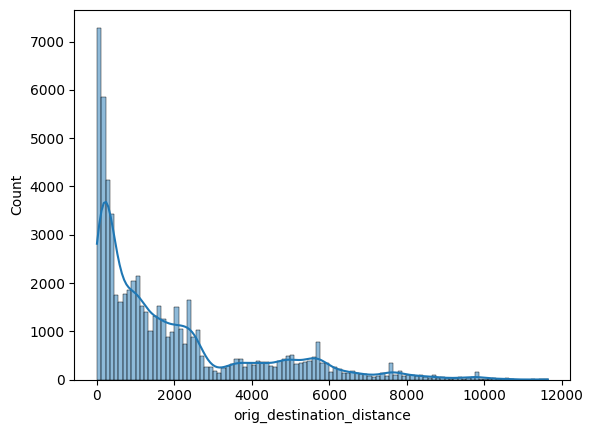

In [146]:
sns.histplot(train['orig_destination_distance'],kde=True)

In [147]:
#Using Median: Since the data is skewed, the median is a better measure to use for imputation.
train['orig_destination_distance'].fillna(train['orig_destination_distance'].median(), inplace=True)

/var/folders/qh/z2q31mxn1w14dq3q46dj8fnh0000gn/T/ipykernel_4008/2164462876.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['orig_destination_distance'].fillna(train['orig_destination_distance'].median(), inplace=True)


In [148]:
train.dropna(inplace=True)

In [149]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99929 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype          
---  ------                     --------------  -----          
 0   date_time                  99929 non-null  datetime64[ns] 
 1   site_name                  99929 non-null  int64          
 2   posa_continent             99929 non-null  int64          
 3   user_location_country      99929 non-null  int64          
 4   user_location_region       99929 non-null  int64          
 5   user_location_city         99929 non-null  int64          
 6   orig_destination_distance  99929 non-null  float64        
 7   user_id                    99929 non-null  int64          
 8   is_mobile                  99929 non-null  int64          
 9   is_package                 99929 non-null  int64          
 10  channel                    99929 non-null  int64          
 11  srch_ci                    99929 non-null  datetime64[ns] 


In [151]:
destionations=pd.read_csv('/Users/iliyask/Desktop/Developer/hotel_recommendation/data/expedia-hotel-recommendations/destinations.csv', nrows=100000)

In [174]:
#let's have a data only hotel that were booked
train=train[train['is_booking']==1]

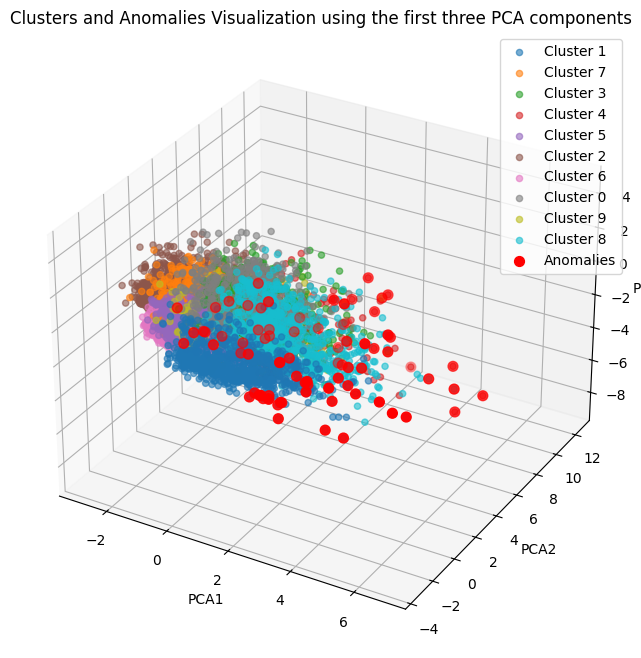

In [183]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Drop unnecessary columns
columns_to_drop = ['date_time', 'srch_ci', 'srch_co', 'user_id','site_name','hotel_cluster']
train_cleaned = train.drop(columns=columns_to_drop)

# Convert timedelta columns to float (days)
train_cleaned['stay_dur'] = train_cleaned['stay_dur'].dt.days
train_cleaned['no_of_days_bet_booking'] = train_cleaned['no_of_days_bet_booking'].dt.days

# Fill any remaining missing values if necessary
train_cleaned.fillna(train_cleaned.median(), inplace=True)

# Scale the data
scaler = StandardScaler()
train_scaled = pd.DataFrame(scaler.fit_transform(train_cleaned), columns=train_cleaned.columns)

# Apply KMeans
kmeans = KMeans(n_clusters=10, random_state=42)
train_scaled['cluster'] = kmeans.fit_predict(train_scaled)

# Use PCA for dimensionality reduction to 10 components
pca = PCA(n_components=10)
train_pca = pd.DataFrame(pca.fit_transform(train_scaled.drop(columns=['cluster'])),
                         columns=[f'PCA{i+1}' for i in range(10)])
train_pca['cluster'] = train_scaled['cluster']

# Calculate the distance to cluster centroids
centroids = kmeans.cluster_centers_
train_pca['distance_to_centroid'] = train_scaled.apply(lambda row: np.linalg.norm(row.drop('cluster') - centroids[int(row['cluster'])]), axis=1)

# Set a threshold for anomalies
threshold = train_pca['distance_to_centroid'].mean() + 3 * train_pca['distance_to_centroid'].std()
anomalies = train_pca[train_pca['distance_to_centroid'] > threshold]

# Plot the clusters and anomalies using the first three principal components in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster in train_pca['cluster'].unique():
    cluster_data = train_pca[train_pca['cluster'] == cluster]
    ax.scatter(cluster_data['PCA1'], cluster_data['PCA2'], cluster_data['PCA3'],
               label=f'Cluster {cluster}', alpha=0.6)

# Plot anomalies
ax.scatter(anomalies['PCA1'], anomalies['PCA2'], anomalies['PCA3'],
           color='red', label='Anomalies', s=50)

ax.set_title('Clusters and Anomalies Visualization using the first three PCA components')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.legend()
plt.show()


In [184]:
anomalies

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,cluster,distance_to_centroid
9,2.464554,6.755782,0.101961,-3.002175,-0.780482,0.944081,1.577606,-1.031390,1.919793,0.773396,4,7.609626
159,-1.198081,3.040363,-1.484666,-0.574153,3.161947,0.705908,0.815958,1.583416,-1.271145,-2.452571,7,7.916428
471,0.203217,9.803933,-4.010629,-1.101691,3.887177,1.765220,-0.263690,1.508271,0.175075,-0.911557,4,10.631868
482,0.478019,7.715618,-4.517452,-2.022234,1.246288,-2.539750,-2.651009,-1.917775,-3.309624,7.524434,4,15.694022
780,3.016280,2.844722,-2.562056,1.566554,-1.903963,1.640344,-0.713570,3.041419,-0.124899,-0.302492,4,8.442316
...,...,...,...,...,...,...,...,...,...,...,...,...
7394,4.251431,-0.122012,-1.356292,0.406868,1.234795,0.207289,0.594723,1.234743,3.619383,-0.850117,1,7.189991
7577,4.515176,-2.831780,-2.157468,0.339817,-2.390715,3.066115,-1.097618,-0.523123,2.100119,-0.432484,1,8.016246
7670,3.491450,-1.717511,-0.651268,1.009831,1.737835,0.126670,-1.416692,0.235338,0.478045,-1.229150,3,7.816712
7936,4.130908,0.247574,-0.590403,3.869137,2.219593,1.042914,1.160731,2.426362,0.128015,-1.893854,3,7.205559


In [182]:
train.columns

Index(['date_time', 'site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id',
       'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market',
       'hotel_cluster', 'stay_dur', 'no_of_days_bet_booking', 'Cin_day',
       'Cin_month', 'Cin_year'],
      dtype='object')